In [17]:
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import pandas as pd
%matplotlib inline  

In [18]:
data = {'Model Name': ['Default SpaCy NER,\n Tok2Vec', 'Default SpaCy NER +\n 2022 Entity Ruler,\ns Tok2Vec', 'Submodels, Tok2Vec', 'Single Model, Tok2Vec', 'Submodels, Transformer', 'Single Model, Transformer'],
        'Mean F1-Score': [10.72, 11.92, 87.59, 87.60, 93.10, 93.87],
        'Standard Error': [1.549, 2.0345, 1.612, 1.641, 1.352, 1.085],
        'Lower Bound (95% CI)': [7.571, 8.025, 83.62, 83.75, 90.14, 91.58],
        'Upper Bound (95% CI)': [13.56, 16.78, 90.76, 90.37, 95.30, 95.68]}
df = pd.DataFrame(data, columns = ['Model Name', 'Mean F1-Score', 'Standard Error', 'Lower Bound (95% CI)', 'Upper Bound (95% CI)'])

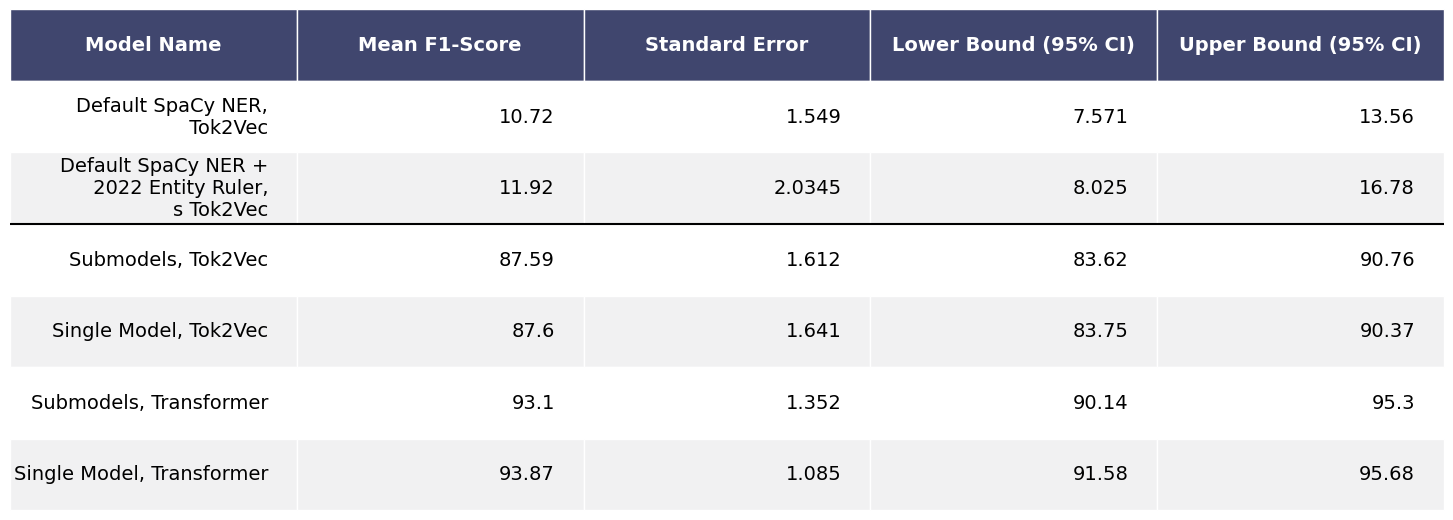

In [19]:
import six
def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')
        fig.set_size_inches(18.5, 6.5)
        
    ax.axis([0,1,data.shape[0],-1])

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)


    for k, cell in six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax


def set_row_edge_color(ax, row, color):
    ax.axhline(y=row, color=color)

ax = render_mpl_table(df, header_columns=0, col_width=2.0)
set_row_edge_color(ax, 2, 'k')
plt.show()


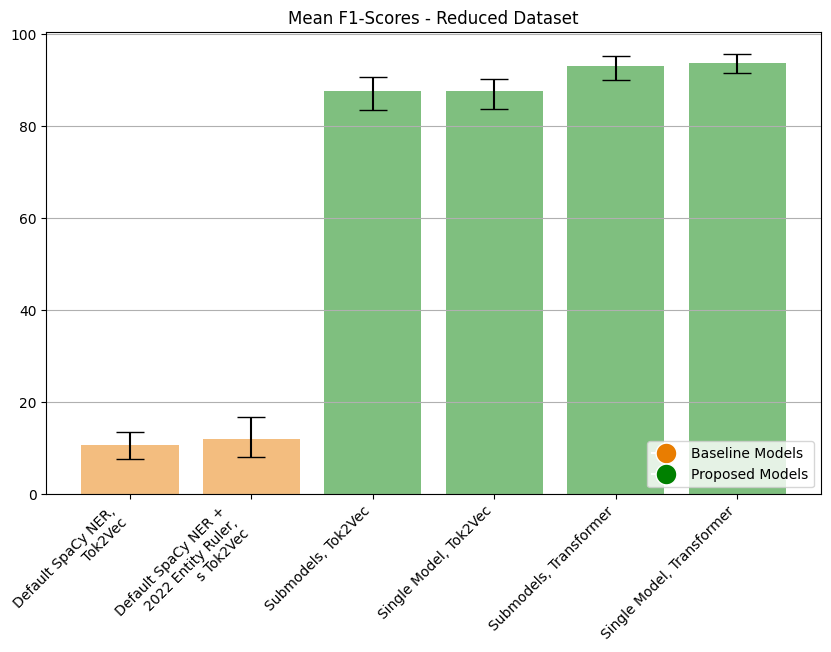

In [20]:

ylb = np.subtract(df['Mean F1-Score'], df['Lower Bound (95% CI)'])
yub = np.subtract(df['Upper Bound (95% CI)'], df['Mean F1-Score'])

# Create plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(
    df['Model Name'], 
    df['Mean F1-Score'], 
    yerr=(ylb, yub), 
    align='center', 
    alpha=0.5, 
    ecolor='black', 
    capsize=10,
    color=['#e97d01', '#e97d01', 'green', 'green', 'green', 'green']
    )
ax.set_title('Mean F1-Scores - Reduced Dataset')

# # expand width of image
# fig.set_size_inches(18.5, 10.5)

# wrap text
plt.xticks(rotation=45, ha='right')

# add a color legend
legend_elements = [
    mpl.lines.Line2D([0], [0], marker='o', color='w', label='Baseline Models', markerfacecolor='#e97d01', markersize=15),
    mpl.lines.Line2D([0], [0], marker='o', color='w', label='Proposed Models', markerfacecolor='green', markersize=15)
]

ax.legend(handles=legend_elements, loc='lower right')
ax.yaxis.grid(True)
